<a href="https://colab.research.google.com/github/IvanGoyena/CURSO-DATA-SCIENCE/blob/main/Entregable/ProyectoFinalIvanRodriguezGoyenaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivos del Proyecto


El objetivo principal de este trabajo es analizar cómo varía el precio final de los pedidos de tacos (Price ($)) en función de distintas variables operativas, temporales y geográficas presentes en el conjunto de datos.

El análisis se centra especialmente en variables categóricas, como la hora del día, el mes, el momento del día (mañana, tarde, noche) y la ubicación de entrega, para identificar patrones de comportamiento que puedan incidir en el valor final pagado por los clientes.

Adicionalmente, se incorporan variables numéricas como la cantidad de toppings, la distancia de entrega, el monto de la propina y la duración de la entrega, con el objetivo de complementar la explicación del precio desde un enfoque multivariable.

A lo largo del trabajo se aplican herramientas de análisis exploratorio, visualización y modelado predictivo, buscando tanto describir los factores que influyen en el precio como evaluar su capacidad explicativa. El enfoque general está orientado a comprender el impacto de las distintas categorías en el precio, más que a optimizar un modelo de predicción.

# Carga del DATASET e informacion general

In [3]:
import pandas as pd
import numpy as np

# Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"
df = pd.read_csv(url)

# Vista general del dataset
print("Primeras filas del dataset:")
print(df.head())

# Dimensiones
print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# Información general
print("\nInformación del dataset:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas de variables numéricas
print("\nResumen estadístico:")
print(df.describe())

# Tipos de variables
print("\nTipos de datos por columna:")
print(df.dtypes)

Primeras filas del dataset:
   Order ID   Restaurant Name     Location        Order Time  \
0    770487      El Taco Loco     New York  01-08-2024 14:55   
1    671858      El Taco Loco  San Antonio  23-11-2024 17:11   
2    688508        Taco Haven       Austin  21-11-2024 20:24   
3    944962  Spicy Taco House       Dallas  21-09-2024 06:43   
4    476417     Casa del Taco  San Antonio  24-07-2024 11:01   

      Delivery Time  Delivery Duration (min) Taco Size     Taco Type  \
0  01-08-2024 15:36                       41   Regular  Chicken Taco   
1  23-11-2024 17:25                       14   Regular     Beef Taco   
2  21-11-2024 21:02                       38     Large     Pork Taco   
3  21-09-2024 07:28                       45   Regular  Chicken Taco   
4  24-07-2024 11:16                       15     Large     Pork Taco   

   Toppings Count  Distance (km)  Price ($)  Tip ($)  Weekend Order  
0               5           3.01       9.25     2.22          False  
1             

# Análisis Exploratorio y Reprocesamiento



Se realizó una limpieza inicial y un análisis exploratorio completo del dataset, identificando las variables relevantes y comprendiendo su distribución y tipo. Se convirtieron las fechas a formatos útiles (fecha, mes, hora, día de la semana) para enriquecer la información temporal, y se prepararon variables categóricas para su posterior codificación. Esta etapa fue fundamental para asegurar la calidad de los datos y sentar las bases para el modelado.




### Transformaciones Realizadas

In [4]:
# Cambio de formato Fecha y Extraccion Dia , Mes, Año, Hora , Dia de semana , Fin de semana.


df['Order Time'] = pd.to_datetime(df['Order Time'].astype(str), format="%d-%m-%Y %H:%M", errors='coerce')
df["Fecha"] = df["Order Time"].dt.date
df["Hora"] = df["Order Time"].dt.hour
df["Mes"] = df["Order Time"].dt.month
df['Nombre_Mes'] = df['Order Time'].dt.strftime('%B')
df['Año'] = df['Order Time'].dt.year
df["Día de Semana"] = df["Order Time"].dt.day_name()
df['Es_Finde'] = df['Día de Semana'].isin(['Saturday', 'Sunday'])


# Clasificacion momento del Dia
def asignar_momento(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['Momento_del_día'] = df['Hora'].apply(asignar_momento)

### Multigraficos Exploratorios

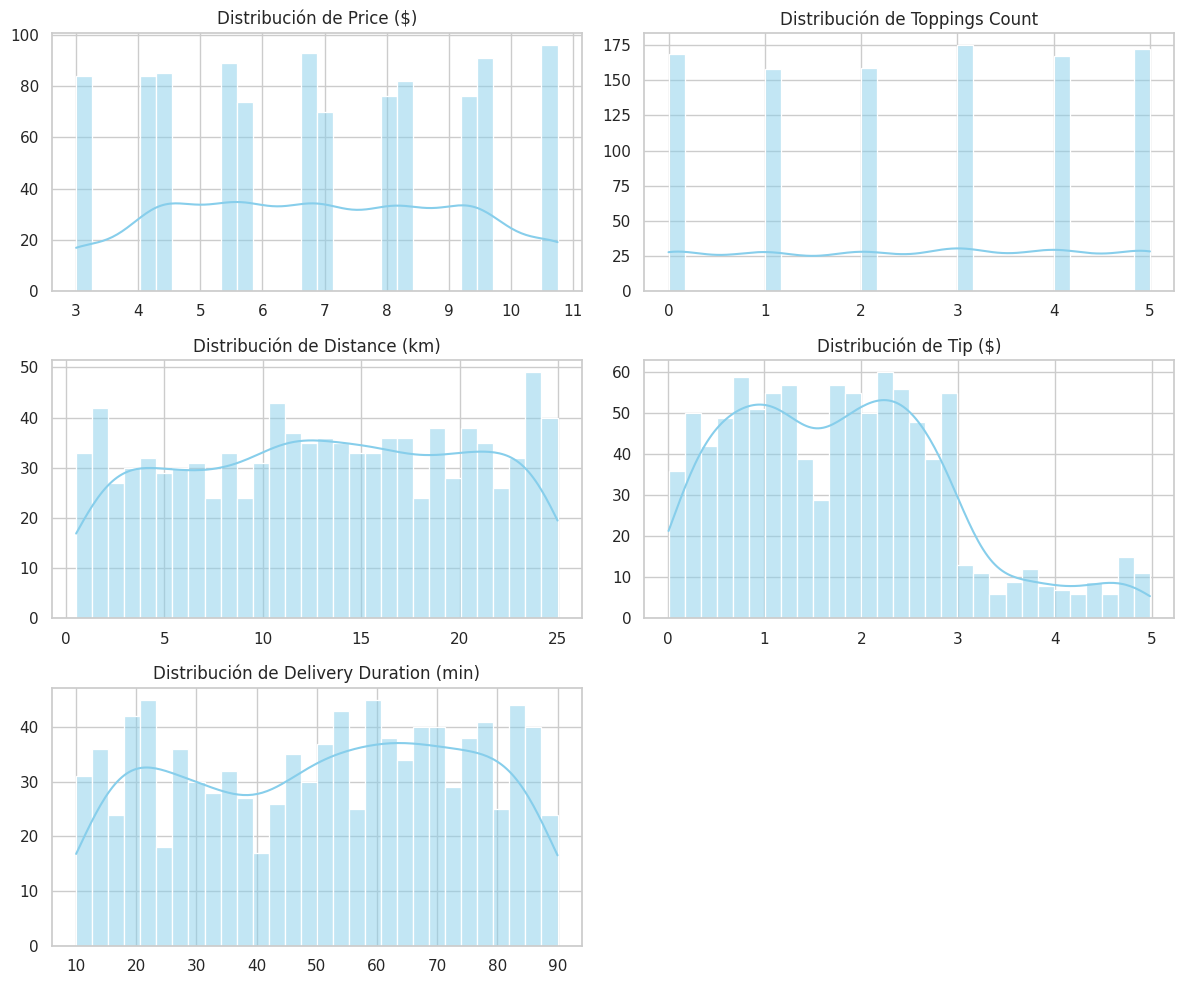

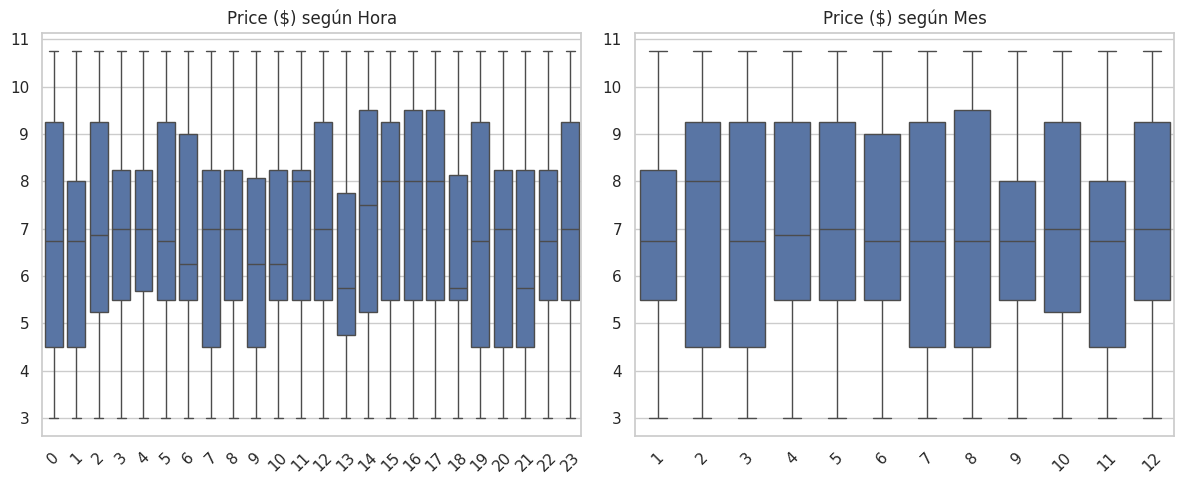

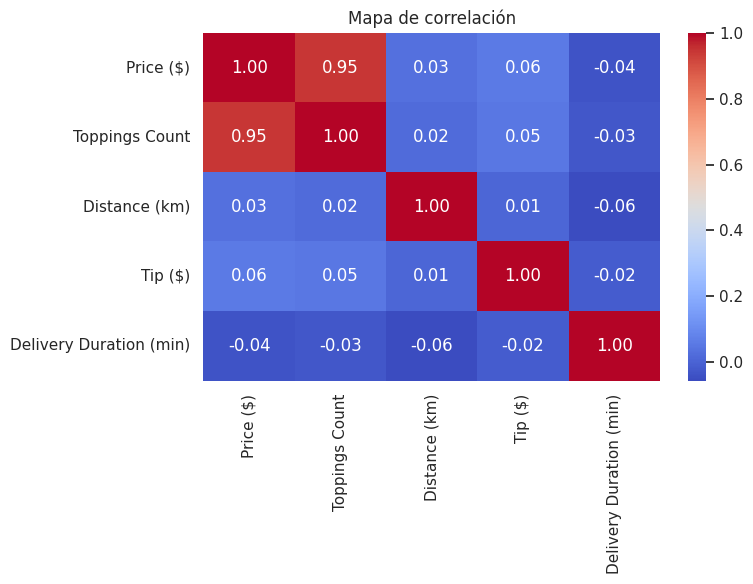

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import math  # ✅ Import necesario

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Variables clave
vars_numericas = ['Price ($)', 'Toppings Count', 'Distance (km)', 'Tip ($)', 'Delivery Duration (min)']
vars_categoricas = ['Hora', 'Mes']

# 1. Histogramas de variables numéricas
fig, axes = plt.subplots(nrows=math.ceil(len(vars_numericas) / 2), ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(vars_numericas):
    sns.histplot(df[var].dropna(), kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar ejes vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 2. Boxplots de Price ($) según variables categóricas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, var in enumerate(vars_categoricas):
    sns.boxplot(x=var, y='Price ($)', data=df, ax=axes[i])
    axes[i].set_title(f'Price ($) según {var}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# 3. Heatmap de correlación entre variables numéricas
plt.figure(figsize=(8, 6))
corr = df[vars_numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlación')
plt.tight_layout()
plt.show()



# Hipotesis y respuestas

In [6]:
# Hipótesis 1: ¿Cuánto influye la cantidad de toppings en el precio?
print("🔹 Hipótesis 1: A mayor cantidad de toppings, mayor será el precio del pedido.\n")

print("Promedio de precio según la cantidad de toppings:")
print(df.groupby('Toppings Count')['Price ($)'].mean().round(2))

print("\nCorrelación entre cantidad de toppings y precio:")
print(df['Toppings Count'].corr(df['Price ($)']).round(3))

print("\n" + "="*60 + "\n")


# Hipótesis 2: ¿El precio aumenta con la distancia del delivery?
print("🔹 Hipótesis 2: A mayor distancia de entrega, mayor será el precio del pedido.\n")

df['Rango_distancia'] = pd.cut(df['Distance (km)'], bins=[0, 1, 3, 5, 10, 20], right=False)

print("Precio promedio por rango de distancia:")
print(df.groupby('Rango_distancia')['Price ($)'].mean().round(2))

print("\nCorrelación entre distancia y precio:")
print(df['Distance (km)'].corr(df['Price ($)']).round(3))

print("\n" + "="*60 + "\n")


# Hipótesis 3: ¿Los pedidos más caros reciben propinas mayores?
print("🔹 Hipótesis 3: Los pedidos con precios más altos reciben propinas mayores.\n")

print("Correlación entre propina y precio:")
print(df['Tip ($)'].corr(df['Price ($)']).round(3))

df['Rango_precio'] = pd.cut(df['Price ($)'], bins=[0, 10, 20, 30, 50], right=False)

print("\nPromedio de propina por rango de precio:")
print(df.groupby('Rango_precio')['Tip ($)'].mean().round(2))

print("\n" + "="*60 + "\n")


# Hipótesis 4: ¿Hay horarios con precios más altos?
print("🔹 Hipótesis 4: Hay horarios del día en los que el precio promedio es mayor.\n")

print("Precio promedio por momento del día:")
print(df.groupby('Momento_del_día')['Price ($)'].mean().round(2))

print("\nPrecio promedio por hora:")
print(df.groupby('Hora')['Price ($)'].mean().round(2))

print("\n" + "="*60 + "\n")


# Hipótesis 5: ¿El precio varía según el mes?
print("🔹 Hipótesis 5: Existen meses con precios promedio más altos que otros.\n")

print("Precio promedio por mes:")
print(df.groupby('Mes')['Price ($)'].mean().round(2))

print("\n" + "="*60 + "\n")


# Hipótesis 6: ¿Algunas locaciones venden a precios más altos?
print("🔹 Hipótesis 6: Algunas locaciones venden sistemáticamente a precios más altos.\n")

print("Precio promedio por locación:")
print(df.groupby('Location')['Price ($)'].mean().sort_values(ascending=False).round(2))

print("\n" + "="*60 + "\n")


🔹 Hipótesis 1: A mayor cantidad de toppings, mayor será el precio del pedido.

Promedio de precio según la cantidad de toppings:
Toppings Count
0     3.75
1     4.95
2     6.16
3     7.45
4     8.82
5    10.09
Name: Price ($), dtype: float64

Correlación entre cantidad de toppings y precio:
0.946


🔹 Hipótesis 2: A mayor distancia de entrega, mayor será el precio del pedido.

Precio promedio por rango de distancia:
Rango_distancia
[0, 1)      6.70
[1, 3)      6.51
[3, 5)      6.75
[5, 10)     6.87
[10, 20)    7.06
Name: Price ($), dtype: float64

Correlación entre distancia y precio:
0.031


🔹 Hipótesis 3: Los pedidos con precios más altos reciben propinas mayores.

Correlación entre propina y precio:
0.059

Promedio de propina por rango de precio:
Rango_precio
[0, 10)     1.81
[10, 20)    1.73
[20, 30)     NaN
[30, 50)     NaN
Name: Tip ($), dtype: float64


🔹 Hipótesis 4: Hay horarios del día en los que el precio promedio es mayor.

Precio promedio por momento del día:
Momento_del_dí

/tmp/ipython-input-6-1856122361.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Rango_distancia')['Price ($)'].mean().round(2))
/tmp/ipython-input-6-1856122361.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Rango_precio')['Tip ($)'].mean().round(2))


# Regresion

### Comparación de Modelos de Regresión

Se evaluaron diferentes modelos de regresión lineal para medir su desempeño.
El modelo Ridge mostro la mejor capacidad predictiva, con un R2 promedio cercano al 0.89 y bajo error medio cuadrático.
Podemos entender que el modelo explica bien la variabilidad del precio usando las variables seleccionadas y es robusto frente a la variabilidad del conjunto de datos.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

df_reg = df.copy()

# Definicion de Features
features = [
    'Toppings Count',
    'Distance (km)',
    'Tip ($)',
    'Delivery Duration (min)',
    'Hora',
    'Mes',
    'Location',
    'Momento_del_día'
]

X = df_reg[features]
y = df_reg['Price ($)']

# Identificacion Variables Categoricas y Numericas

categorical_features = ['Location', 'Momento_del_día']
numerical_features = [col for col in features if col not in categorical_features]

# Aplicacion one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
models = {
    'Linear': Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Ridge': Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())]),
    'Lasso': Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())]),
    'ElasticNet': Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet())])
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Modelo': name, 'MSE': mse, 'R²': r2})

results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)

       Modelo       MSE        R²
1       Ridge  0.557827  0.889915
0      Linear  0.558048  0.889871
3  ElasticNet  0.852145  0.831832
2       Lasso  0.867871  0.828729


### Grafico de Prediccion VS Real y Grafico de Residuos

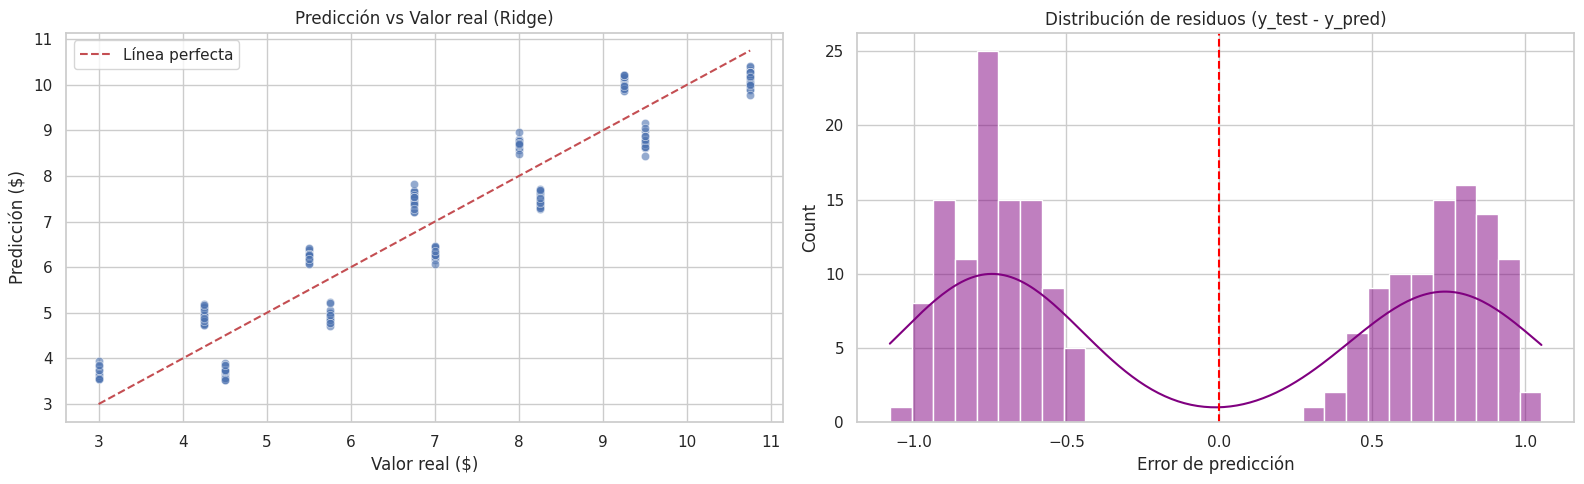

📊 Métricas de evaluación del modelo Ridge:
MAE  (Error absoluto medio):       $0.74
MSE  (Error cuadrático medio):     0.56
RMSE (Raíz del error cuadrático):  0.75
R²   (Coeficiente de determinación): 0.8854


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 0. Definir features y target
features = [
    'Toppings Count',
    'Distance (km)',
    'Tip ($)',
    'Delivery Duration (min)',
    'Hora',
    'Mes',
    'Location',
    'Momento_del_día'
]

X = df[features]
y = df['Price ($)']

# 1. Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Preprocesamiento
numeric_features = [
    'Toppings Count', 'Distance (km)', 'Tip ($)', 'Delivery Duration (min)', 'Hora', 'Mes'
]
categorical_features = ['Location', 'Momento_del_día']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 3. Procesar los datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Entrenar modelo Ridge
ridge = Ridge()
ridge.fit(X_train_processed, y_train)

# 5. Predecir y calcular residuos
y_pred = ridge.predict(X_test_processed)
residuals = y_test - y_pred


# 6 y 7. Gráficos: Predicción vs Real y Distribución de residuos
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea perfecta')
axes[0].set_xlabel('Valor real ($)')
axes[0].set_ylabel('Predicción ($)')
axes[0].set_title('Predicción vs Valor real (Ridge)')
axes[0].legend()

# Gráfico 2
sns.histplot(residuals, kde=True, bins=30, color='purple', ax=axes[1])
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_title('Distribución de residuos (y_test - y_pred)')
axes[1].set_xlabel('Error de predicción')

plt.tight_layout()
plt.show()


# 8. Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Métricas de evaluación del modelo Ridge:")
print(f"MAE  (Error absoluto medio):       ${mae:.2f}")
print(f"MSE  (Error cuadrático medio):     {mse:.2f}")
print(f"RMSE (Raíz del error cuadrático):  {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.4f}")

### Validacion Cruzada

In [9]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd


features = [
    'Toppings Count',
    'Distance (km)',
    'Tip ($)',
    'Delivery Duration (min)',
    'Hora',
    'Mes',
    'Location',
    'Momento_del_día'
]

X = df_reg[features]
y = df_reg['Price ($)']


categorical_features = ['Location', 'Momento_del_día']
numerical_features = [col for col in features if col not in categorical_features]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])



kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrica: R²
r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print("R² por fold:", r2_scores)
print("Promedio R²:", r2_scores.mean())

#  Metrica: MSE
mse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print("\nMSE por fold:", mse_scores)
print("Promedio MSE:", mse_scores.mean())

R² por fold: [0.88532526 0.90253201 0.90580965 0.88172533 0.88334715]
Promedio R²: 0.8917478832370772

MSE por fold: [0.56462955 0.55725128 0.55841397 0.59857607 0.56664831]
Promedio MSE: 0.5691038354092008


### Grafico Validacion Cruzada

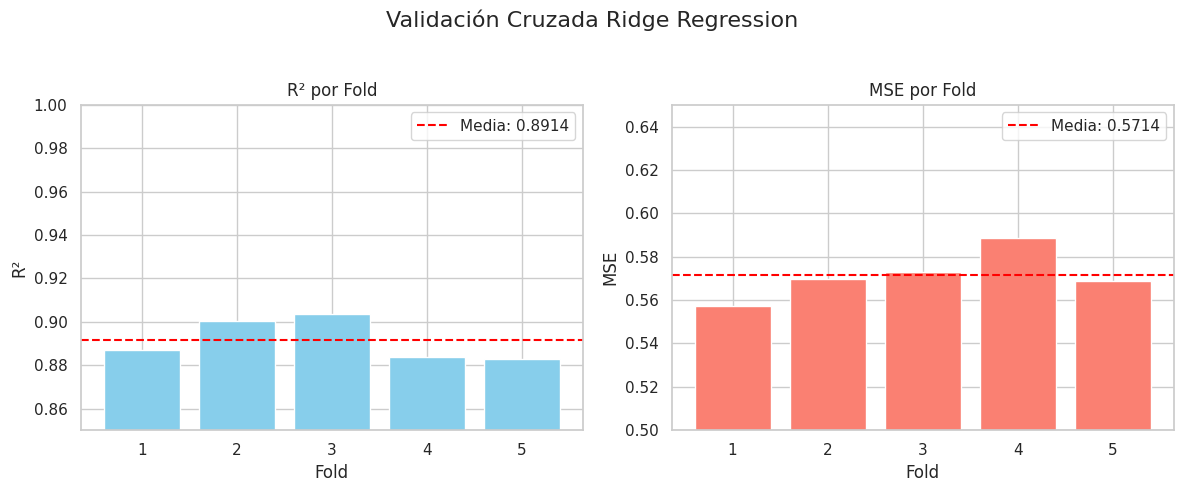

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados (ejemplo con tus datos)
r2_scores = np.array([0.8867899, 0.90036919, 0.90338411, 0.8836605, 0.88293954])
mse_scores = np.array([0.55741803, 0.56961671, 0.57279397, 0.5887824, 0.56862832])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico R²
axs[0].bar(range(1, 6), r2_scores, color='skyblue')
axs[0].set_title('R² por Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('R²')
axs[0].set_ylim([0.85, 1])
axs[0].axhline(r2_scores.mean(), color='red', linestyle='--', label=f'Media: {r2_scores.mean():.4f}')
axs[0].legend()

# Gráfico MSE
axs[1].bar(range(1, 6), mse_scores, color='salmon')
axs[1].set_title('MSE por Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MSE')
axs[1].set_ylim([0.5, 0.65])
axs[1].axhline(mse_scores.mean(), color='red', linestyle='--', label=f'Media: {mse_scores.mean():.4f}')
axs[1].legend()

plt.suptitle('Validación Cruzada Ridge Regression', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#  Conclusión del modelo de regresión
Luego de comparar diferentes modelos de regresión lineal (Linear, Ridge, Lasso y ElasticNet), el modelo Ridge Regression demostró ser el más eficiente para predecir el precio de los tacos (Price ($)) a partir de variables como:

Cantidad de toppings

Distancia de entrega

Propina

Duración del delivery

Hora y mes del pedido

Localización y momento del día (como variables categóricas codificadas)

El rendimiento del modelo fue evaluado con métricas de error y poder explicativo, obteniendo:

R² promedio en validación cruzada (5 folds): 0.89
→ El modelo explica aproximadamente el 89% de la variabilidad en el precio.

MSE promedio: alrededor de 0.57
→ Los errores de predicción son bajos y consistentes entre los pliegues.

Además, los gráficos de residuos muestran una distribución aproximadamente normal, centrada en cero, lo que indica que no hay sesgos sistemáticos en las predicciones.

En resumen, el modelo Ridge ofrece predicciones precisas y generalizables, siendo una herramienta confiable para estimar el precio de los pedidos a partir de información operativa del sistema de ventas.

# Conclusion Final y Reflexion del Trabajo Practico


En este trabajo práctico tuve la oportunidad de aplicar por primera vez conceptos y herramientas del análisis de datos a un caso real: un conjunto de registros de ventas de tacos. A lo largo del desarrollo, exploré la información, formulé hipótesis y realicé visualizaciones para entender mejor cómo se comportan ciertas variables clave como el precio, la cantidad de ingredientes, las propinas y los tiempos de entrega.

Además, como parte de la consigna, seleccioné algunas variables numéricas y categóricas relevantes para entrenar distintos modelos de regresión. El objetivo fue predecir el precio de un pedido en función de variables como la cantidad de toppings, la distancia recorrida o el momento del día. Después de comparar diferentes modelos, el que obtuvo el mejor rendimiento fue Ridge Regression, con un buen nivel de precisión (R² de aproximadamente 0,89).

Más allá de los resultados, lo más valioso del trabajo fue el proceso: aprendí a limpiar datos, visualizarlos, plantear preguntas de negocio, usar modelos simples y evaluar su desempeño. También entendí mejor la importancia de cada etapa en un análisis de datos completo.

Si bien aún me queda mucho por aprender, este primer acercamiento me permitió poner en práctica los conceptos básicos del mundo de los datos y me motivó a seguir profundizando en herramientas como Python, SQL y técnicas de visualización.